In [1]:
import numpy as np
import matplotlib.pyplot as plt

In the previous section, we introduced simple and multiple perceptron. In the example, we used $\text{sgn}(x)$ as the activation function. This activation function helps us in binary classification tasks. It turns out that a simple perceptron is capable of performing a wide range of tasks by altering the activation function. For example, a simple perceptron is capable of performing regression tasks by using activation functions such as linear function. It is also able to perform classification task by using logistic activation function. In this section, we will explore some generalizations of simple perceptron.

## Linear regression

By replacing the activation function to linear functions, a simple perceptron is capable of performing linear regression. 

In [2]:
class SimplePerceptron:
    
    def __init__(self, n, activation=lambda x: x, activation_grad = lambda x: 1, lr=0.1):
        self.n = n
        self.w = np.random.normal(0, 1, size=(n + 1, ))
        self.z = None
        self.a = None
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = lr
        self.loss = []
        
    def forward(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.z = np.dot(X, self.w)
        self.a = self.activation(self.z)
    
    def backward(self, X, y):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        dw = np.dot(X.T, (self.a - y) * self.activation_grad(self.z)) / X.shape[0]
        self.w -= self.lr * dw
    
    def train(self, X, y, epochs):
        for i in range(epochs):
            self.forward(X)
            loss = np.mean((self.a - y) ** 2)
            self.backward(X, y)
            self.loss.append(loss)
    
    def plot_loss(self):
        plt.plot(loss)
        plt.show()

Shape of input data: (100, 1)
Shape of output data: (100,)


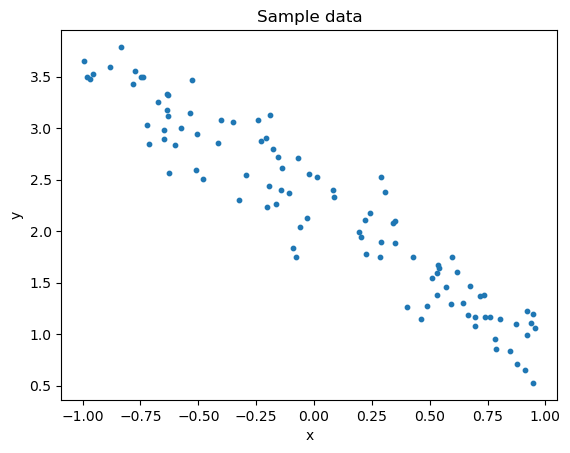

In [3]:
n_samples = 100
n_features = 1
X = np.random.uniform(-1, 1, size=(n_samples, n_features))
Y = np.dot(X, np.array([-1.4])) + np.array([2.3]) + np.random.normal(0, 0.3, size=(n_samples, ))

print(f"Shape of input data: {X.shape}")
print(f"Shape of output data: {Y.shape}")

plt.scatter(np.squeeze(X), Y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample data")
plt.show()

In [4]:
perceptron = SimplePerceptron(n_features)

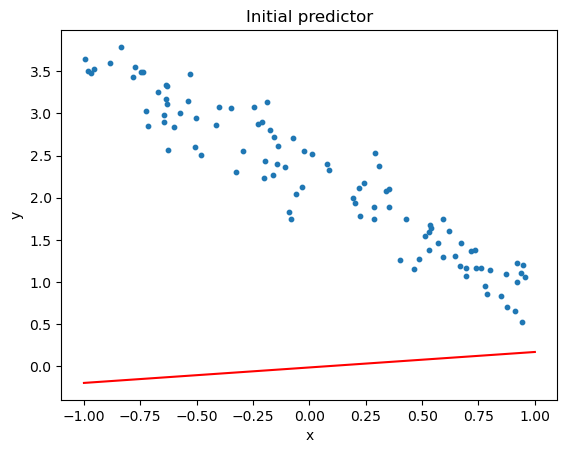

In [5]:
x = np.linspace(-1, 1, 100)
y = x * perceptron.w[0] + perceptron.w[1]
plt.plot(x, y, c="r")
plt.scatter(np.squeeze(X), Y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial predictor")
plt.show()

In [6]:
perceptron.train(X, Y, 100)

In [7]:
perceptron.plot_loss()

NameError: name 'loss' is not defined

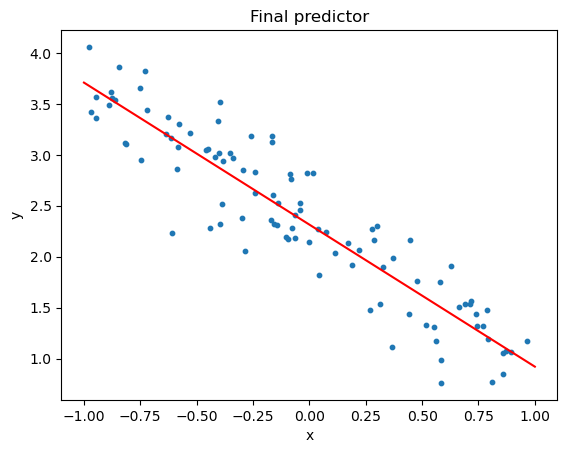

In [306]:
x = np.linspace(-1, 1, 100)
y = x * perceptron.w[0] + perceptron.w[1]
plt.plot(x, y, c="r")
plt.scatter(np.squeeze(X), Y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Final predictor")
plt.show()

## Logistic regression

In [307]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_grad = sigmoid(x) * (1 - sigmoid(x))